<a href="https://colab.research.google.com/github/Priyo-prog/Generative-AI-Lessons/blob/main/DCGANs/DCGAN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Practice - 1**

## Import the Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

## Loading And Preprocessing The Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Visualize a Random Data

2


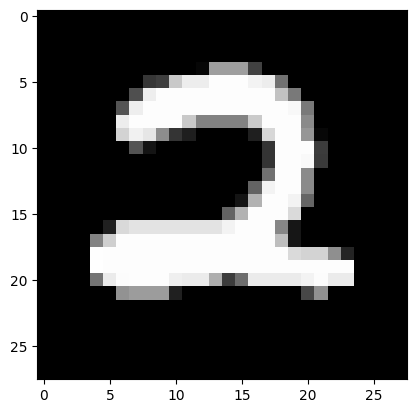

In [3]:
i = np.random.randint(0,60000)

print(y_train[i])
plt.imshow(X_train[i],cmap="gray")

In [4]:
X_train.shape

(60000, 28, 28)

## Reshape The Data

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float16')

In [6]:
X_train.shape

(60000, 28, 28, 1)

## Normalize The Data

In [7]:
X_train = (X_train - 127.5) / 127.5

In [8]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

Determine Buffer Size and Batch  Size of The Data

In [9]:
buffer_size = 60000
batch_size = 256

In [10]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [11]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

## Building The Generator

In [12]:
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units=7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #network.add(layers.Reshape((7,7,256))): Reshapes the output of the dense layer
  #from a 1D tensor of shape (77256) to a 3D tensor of shape (7, 7, 256).
  # This prepares the data for the subsequent convolutional layers.

  network.add(layers.reshape(7,7,256))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding="same", use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), padding="same", strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5,5), padding="same", strides=(2,2), use_bias=False, activation="tanh"))

  network.summary()

  return network